In [20]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

from keras import layers

In [21]:
data_train_path = "data/training_images"
data_test_path = "data/test_images"
data_validation_path = "data/validation_images"

img_width = 180
img_height = 180

In [22]:
data_train = keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

data_category = data_train.class_names

Found 17728 files belonging to 8 classes.


In [23]:
data_val = keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3796 files belonging to 8 classes.


In [24]:
data_test = keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3807 files belonging to 8 classes.


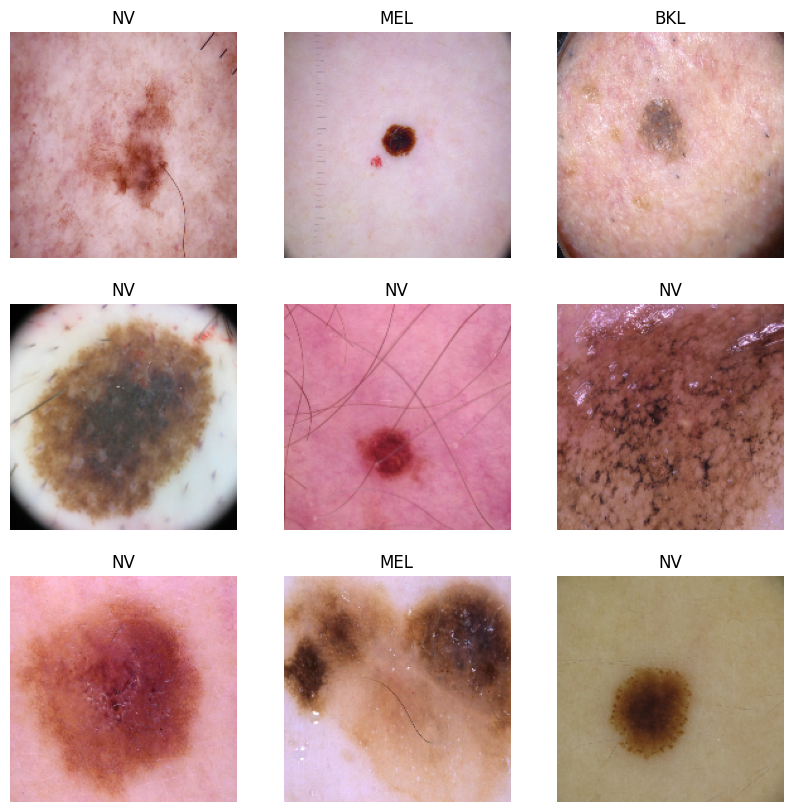

In [25]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_category[labels[i]])
        plt.axis("off")

In [33]:
from keras import Sequential # type: ignore

In [56]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [55]:
model = Sequential([    
    layers.RandomFlip("horizontal_and_vertical"), # Data Augmentation
    layers.RandomRotation(0.2), 
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.01)), # Penalizando grandes pesos por conta da diferença amostral
    layers.Dense(len(data_category))
])

In [57]:
model.compile(
    optimizer='adam', 
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']    
)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
epochs = 25

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    data_train,               # Seu dataset de treinamento
    validation_data=data_val,  # Seu dataset de validação
    epochs=epochs,             # Número de épocas (25)
    early_stopping = early_stopping
)


Epoch 1/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 812s 1s/step - accuracy: 0.5084 - loss: 1.4691 - val_accuracy: 0.5087 - val_loss: 1.4487
Epoch 2/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 813s 1s/step - accuracy: 0.5082 - loss: 1.4491 - val_accuracy: 0.5087 - val_loss: 1.4489
Epoch 3/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 815s 1s/step - accuracy: 0.5090 - loss: 1.4487 - val_accuracy: 0.5087 - val_loss: 1.4487
Epoch 4/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 818s 1s/step - accuracy: 0.5089 - loss: 1.4476 - val_accuracy: 0.5087 - val_loss: 1.4489
Epoch 5/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 818s 1s/step - accuracy: 0.5089 - loss: 1.4463 - val_accuracy: 0.5087 - val_loss: 1.4487
Epoch 6/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 819s 1s/step - accuracy: 0.5097 - loss: 1.4462 - val_accuracy: 0.5087 - val_loss: 1.4488
Epoch 7/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 817s 1s/step - accuracy: 0.5096 - loss: 1.4459 - val_accuracy: 0.5087 - val_loss: 1.4487
Epoch 8/25
554/554 ━━━━━━━━━━━━━━━━━━━━ 820s 1s/step - accuracy: 0.5090 - loss: 1.4464 - val_accu

Text(0.5, 1.0, 'Loss')

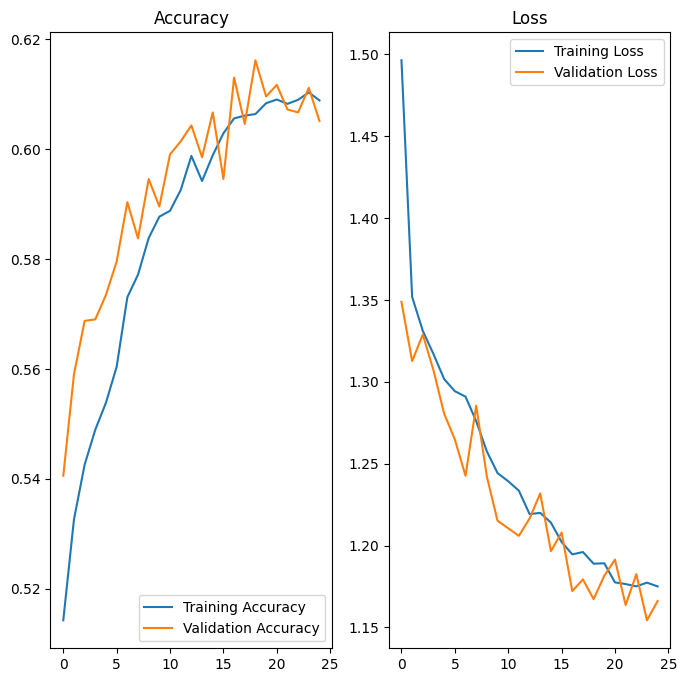

In [47]:
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

In [14]:
model.save('melanoma_model.keras')